<a href="https://colab.research.google.com/github/Tanim-code/Machine-Learning-/blob/main/shopping_mall_customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

import data set

In [ ]:
data=pd.read_csv("mall customers - mall customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data=data.drop('CustomerID',axis=1)

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
data=data.rename(columns={'Annual Income (k$)' : 'Income','Spending Score (1-100)': 'Score'})
data

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
data.isnull().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

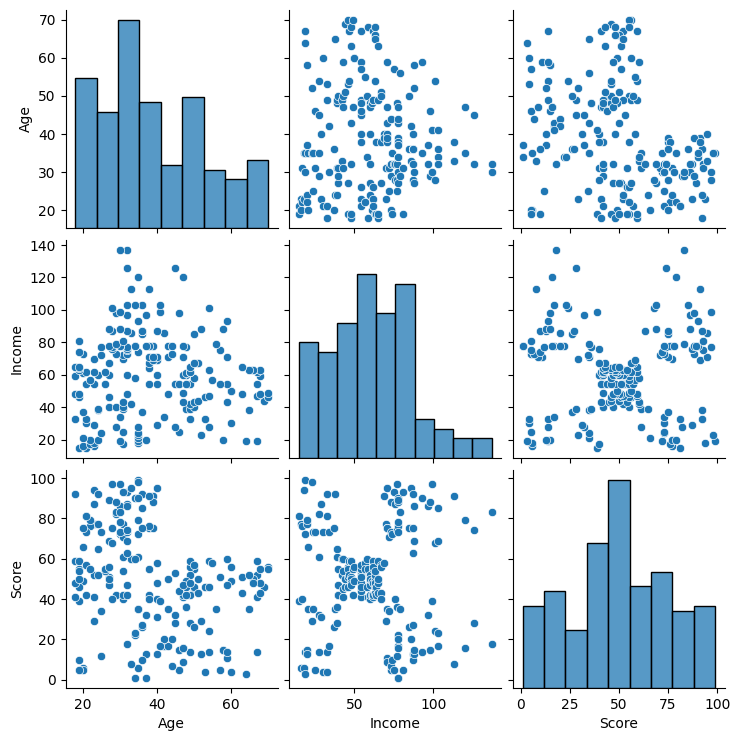

In [ ]:
sns.pairplot(data)

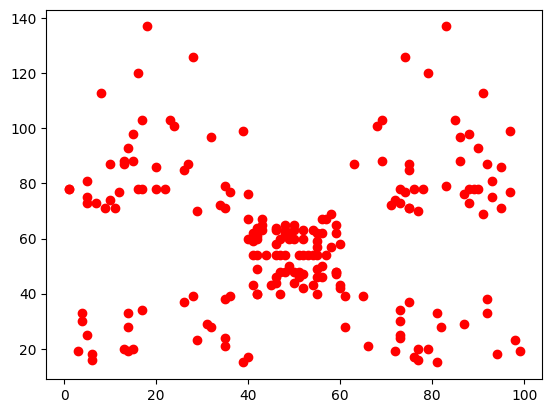

In [ ]:
plot=plt.scatter(data['Score'],data['Income'],c='red')

In [ ]:
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
cluster_range=range(1,15)
for k in cluster_range:
    kn=KMeans(n_clusters=k)
    kn.fit(data[['Income','Score']])
    wcss.append(kn.inertia_)


In [ ]:
wcss


[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37239.835542456036,
 30227.606513152008,
 25018.781613414067,
 21838.86369282892,
 19643.655552199736,
 17584.589416163646,
 15817.740201007091,
 14283.887389620457,
 12844.163231376464]

In [ ]:
!pip install kneed
from kneed import KneeLocator

In [ ]:
kn=KneeLocator(cluster_range,wcss,curve='convex',direction='decreasing')

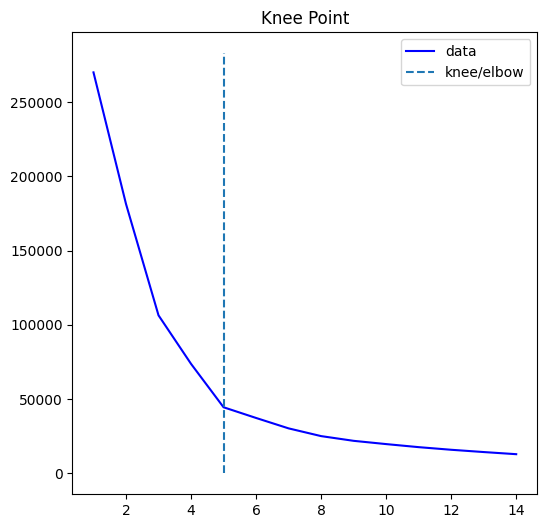

In [ ]:
kn.plot_knee()

In [ ]:
km=KMeans(n_clusters=5)

In [ ]:
km.fit(data[['Income','Score']])

KMeans(n_clusters=5)

In [ ]:
data['new_cluster']=km.predict(data[['Income','Score']])

In [ ]:
data.head()

,Gender,Age,Income,Score,new_cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [ ]:
data['new_cluster'].value_counts()

new_cluster
1    81
0    39
2    35
4    23
3    22
Name: count, dtype: int64

In [ ]:
data0=data[data['new_cluster']==0]
data1=data[data['new_cluster']==1]
data2=data[data['new_cluster']==2]
data3=data[data['new_cluster']==3]
data4=data[data['new_cluster']==4]

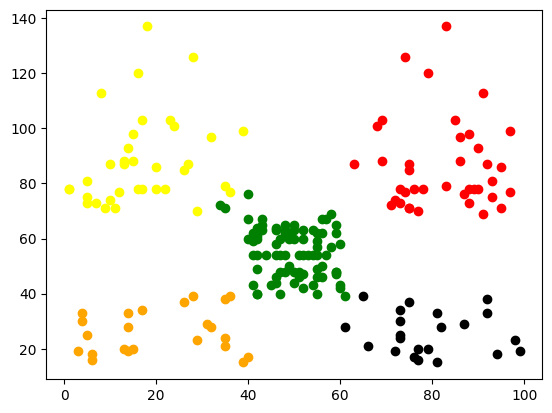

In [ ]:
plt.scatter(data0['Score'] , data0['Income'], c='red')
plt.scatter(data1['Score'] , data1['Income'], c='green')
plt.scatter(data2['Score'] , data2['Income'], c='yellow')
plt.scatter(data3['Score'] , data3['Income'], c='black')
plt.scatter(data4['Score'] , data4['Income'], c='orange')